# Billboard String Split

## this is an EDA notebook where I'll try to split "performer" into main artist and featuring artist. 

In [2]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime



%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [4]:
# Converting WeekID to datetime
# Note: I'm comfortable with replacing the string column "WeekID"

billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [5]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [1]:
# dropping 'URL' column- I don't think I'll reference it for now

billboard_df = billboard_df.drop(columns=['url'])

NameError: name 'billboard_df' is not defined

In [7]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [8]:
# replacing artist names

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [9]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990


In [10]:
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 

In [11]:
billboard_df["main_performer"]= new[0] 

In [12]:
billboard_df["featured_performer"]= new[1] 

In [13]:
billboard_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,Jane Child,None
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,Jane Child,None
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,Jane Child,None
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,Jane Child,None
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,Jane Child,None


In [14]:
billboard_df.featured_performer.value_counts()

Drake                                                           691
Lil Wayne                                                       626
Nicki Minaj                                                     456
Chris Brown                                                     341
T-Pain                                                          306
Ludacris                                                        299
Rihanna                                                         297
Akon                                                            286
Jay-Z                                                           207
Kanye West                                                      192
Pitbull                                                         190
Bruno Mars                                                      182
R. Kelly                                                        176
Snoop Dogg                                                      171
50 Cent                                         

In [15]:
billboard_df.main_performer.value_counts()

Drake                                                                       1158
Elvis Presley                                                                953
Taylor Swift                                                                 953
Elton John                                                                   889
Madonna                                                                      885
Rihanna                                                                      876
Kenny Chesney                                                                749
Tim McGraw                                                                   738
Chris Brown                                                                  732
Usher                                                                        722
Mariah Carey                                                                 692
Keith Urban                                                                  682
Maroon 5                    

In [16]:
billboard_df.main_performer.nunique()

7927

In [17]:
billboard_df.featured_performer.nunique()

1258

In [18]:
billboard_df.shape

(317795, 15)

In [19]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None


In [20]:
#checking for null values
# it's ok that prev_week_position has nulls- I think that means the song made its debut on the charts
#(or made a reappearance)
billboard_df.isna().sum()

week_id                    0
week_position              0
song                       0
performer                  0
song_id                    0
instance                   0
prev_week_position     30428
peak_position              0
weeks_on_chart             0
date                       0
month                      0
day                        0
year                       0
main_performer             0
featured_performer    288841
dtype: int64

In [21]:
print(billboard_df.week_id.min())
print(billboard_df.week_id.max())

1958-08-02 00:00:00
2019-06-22 00:00:00


In [22]:
# creating DF of performer value counts - this is just total appearances on chart, and does not consider chart position

performer_value_counts_df = billboard_df.performer.value_counts().to_frame().reset_index().rename(columns={"index": "performer", "performer": "total_weeks"})

In [23]:
main_performer_value_counts_df = billboard_df.main_performer.value_counts().to_frame().reset_index().rename(columns={"index": "main_performer", "main_performer": "total_weeks"})

In [24]:
featured_performer_value_counts_df = billboard_df.featured_performer.value_counts().to_frame().reset_index().rename(columns={"index": "featured_performer", "featured_performer": "total_weeks"})

# Boxplots from EDA #1


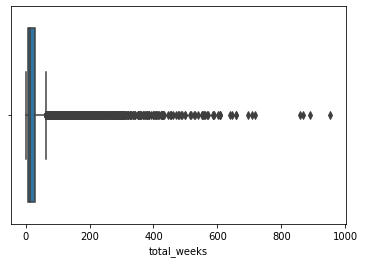

In [25]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="total_weeks", data=performer_value_counts_df)

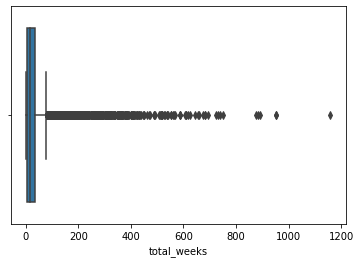

In [26]:
ax = sns.boxplot(x="total_weeks", data=main_performer_value_counts_df)

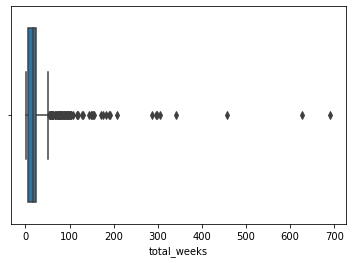

In [27]:
ax = sns.boxplot(x="total_weeks", data=featured_performer_value_counts_df)

# Distplots from EDA 1

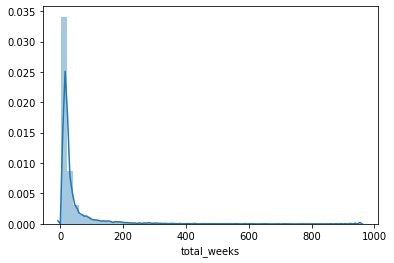

In [28]:
# Distribution plot for all artists in performer_value_counts
ax = sns.distplot(performer_value_counts_df.total_weeks)

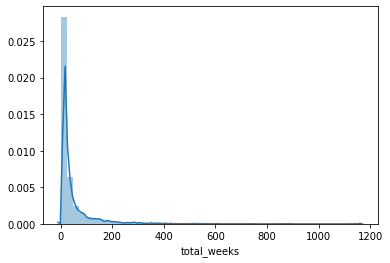

In [29]:
# Distribution plot for all artists in performer_value_counts
ax = sns.distplot(main_performer_value_counts_df.total_weeks)

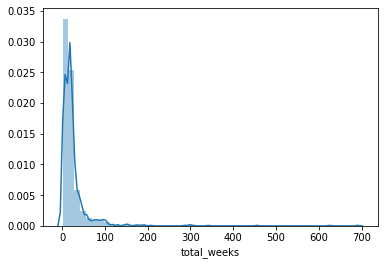

In [30]:
# Distribution plot for all artists in performer_value_counts
ax = sns.distplot(featured_performer_value_counts_df.total_weeks)

# Song ID analysis from Billboard 1

In [31]:
# making value counts DF for individual songs
song_value_count_df = billboard_df.song_id.value_counts().to_frame().reset_index().rename(columns={"index": "song_id", "song_id": "total_weeks"})

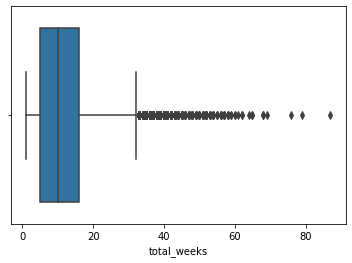

In [32]:
# boxplot of total weeks by song
ax = sns.boxplot(x="total_weeks", data=song_value_count_df)

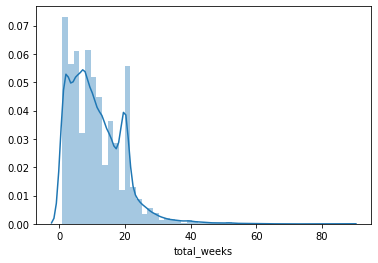

In [33]:
# Distribution of total weeks by song
ax = sns.distplot(song_value_count_df.total_weeks)

# Unique Songs Counts

In [34]:

unique_songs_groupby = billboard_df.groupby('song_id').max()

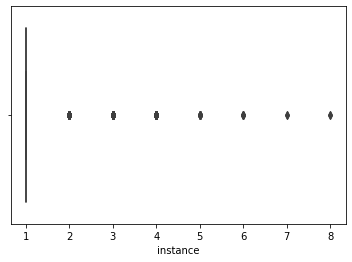

In [35]:
# boxplot of maximum instance per song - we can treat max as "number of instances"
# maybe some other visualization: swarmplot? 
ax = sns.boxplot(x="instance", data= unique_songs_groupby)

In [36]:
billboard_df.head(1000)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,Jane Child,None
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,Jane Child,None
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,Jane Child,None
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,Jane Child,None
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,Jane Child,None


In [37]:
unique_songs_groupby.head()

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
song_id,,,,,,,,,,,,,,
"""B"" GirlsYoung And Restless",1990-08-11,91,"""B"" Girls",Young And Restless,1,84.0,84,15,1990-08-11,8,30,1990,Young And Restless,NaN
"""Cherry Cherry"" from Hot August NightNeil Diamond",1973-05-19,84,"""Cherry Cherry"" from Hot August Night",Neil Diamond,1,84.0,84,10,1973-05-19,5,31,1973,Neil Diamond,NaN
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",1973-12-08,99,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1,99.0,99,9,1973-12-08,12,27,1973,The Ovations (Featuring Louis Williams),NaN
"""Joy"" Pt. IIsaac Hayes",1974-02-16,72,"""Joy"" Pt. I",Isaac Hayes,1,72.0,72,9,1974-02-16,12,29,1974,Isaac Hayes,NaN
"""Roots"" MedleyQuincy Jones",1977-04-16,87,"""Roots"" Medley",Quincy Jones,1,87.0,87,7,1977-04-16,4,26,1977,Quincy Jones,NaN


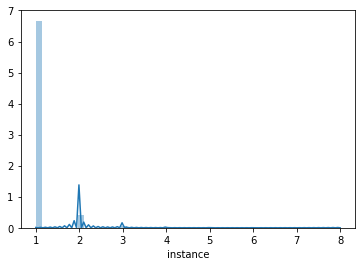

In [38]:
# distplot of instance by song

ax = sns.distplot(unique_songs_groupby.instance)

In [39]:
# making DF of value counts for 'instance by song id'

song_id_instance_value_counts_df = unique_songs_groupby.instance.value_counts().to_frame()

In [40]:
# applying lambda to find percentage of total songs with maximum instance

song_id_instance_value_counts_df['percentage'] = song_id_instance_value_counts_df.apply(lambda row: row.instance / 28193, axis=1)

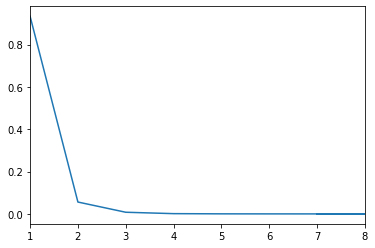

In [41]:
# let's find a better plot format
song_id_instance_value_counts_df.percentage.plot()

In [42]:
# need to figure out a way to visualize this (Christmas)

seven_instances_df = billboard_df[billboard_df['instance'].isin([7,8])]
seven_instances_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
231187,2018-12-08,39,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,NaN,39,12,2018-12-08,12,8,2018,Nat King Cole,None
231188,2018-12-15,29,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,39.0,29,13,2018-12-15,12,15,2018,Nat King Cole,None
231189,2018-12-22,24,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,29.0,24,14,2018-12-22,12,22,2018,Nat King Cole,None
231190,2018-12-29,17,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,24.0,17,15,2018-12-29,12,29,2018,Nat King Cole,None
231191,2019-01-05,11,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,17.0,11,16,2019-01-05,1,5,2019,Nat King Cole,None
231192,2017-12-16,21,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,NaN,21,20,2017-12-16,12,16,2017,Mariah Carey,None
231193,2017-12-23,37,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,NaN,37,20,2017-12-23,12,23,2017,Brenda Lee,None
231194,2017-12-23,11,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,21.0,11,21,2017-12-23,12,23,2017,Mariah Carey,None
231195,2017-12-30,34,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,37.0,34,21,2017-12-30,12,30,2017,Brenda Lee,None
231196,2017-12-30,9,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,11.0,9,22,2017-12-30,12,30,2017,Mariah Carey,None


# creating feature analysis



In [43]:
billboard_df['has_feature'] = billboard_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

In [44]:
# Mean groupby for plotting % feature per year

year_mean_groupby = billboard_df.groupby('year').mean()

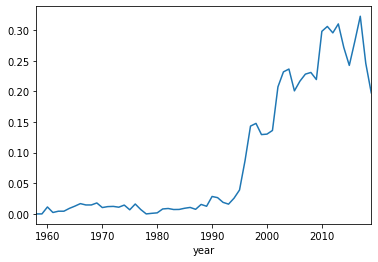

In [45]:
year_mean_groupby.has_feature.plot()

# creating "chart-points" variable
# note: I should maybe move this earlier in the notebook


In [46]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)

In [47]:
# creating groupby for performers

performer_summed_groupby = billboard_df.groupby('performer').sum()
main_performer_summed_groupby = billboard_df.groupby('main_performer').sum()
featured_performer_summed_groupby = billboard_df.groupby('featured_performer').sum()

In [48]:
performer_summed_groupby = performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)
performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
performer,,,,,,,,,,
Elvis Presley,36785,967,30510.0,29953,5807,6413,15245,1874106,0,59468.0
Madonna,29188,857,24576.0,12426,8391,5545,13405,1707296,0,57369.0
Elton John,34312,892,29773.0,23644,8165,6053,13817,1764035,0,55477.0
Taylor Swift,33121,1324,27140.0,20768,12746,5787,13843,1748032,0,54648.0
Mariah Carey,14851,735,12428.0,7015,7517,4056,9477,1213160,0,46456.0


In [49]:
main_performer_summed_groupby = main_performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)
main_performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
main_performer,,,,,,,,,,
Drake,50972,1248,40386.0,31474,12226,7849,18148,2332660,461,65986.0
Rihanna,28286,1022,24813.0,18112,11875,5569,13705,1761560,310,60190.0
Taylor Swift,36615,1503,29847.0,23226,13562,6338,15198,1917259,84,59638.0
Elvis Presley,36785,967,30510.0,29953,5807,6413,15245,1874106,0,59468.0
Madonna,30122,886,25173.0,12859,8625,5693,13813,1763558,28,59263.0


In [50]:
featured_performer_summed_groupby = featured_performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)
featured_performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
featured_performer,,,,,,,,,,
Drake,32723,728,29264.0,23072,7605,4330,10796,1391864,691,37068.0
Lil Wayne,30790,729,26216.0,23407,6908,3927,9954,1258344,626,32436.0
Nicki Minaj,18580,512,15469.0,13712,5040,3071,7146,918067,456,27476.0
T-Pain,9725,322,8548.0,7081,4135,1985,4750,614552,306,21181.0
Rihanna,10050,343,8869.0,5135,3973,1980,4702,597812,297,19947.0


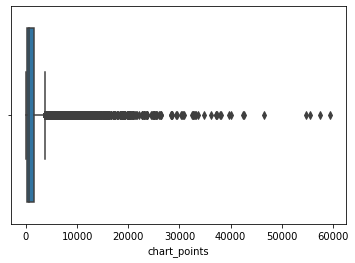

In [51]:
ax = sns.boxplot(x="chart_points", data=performer_summed_groupby)

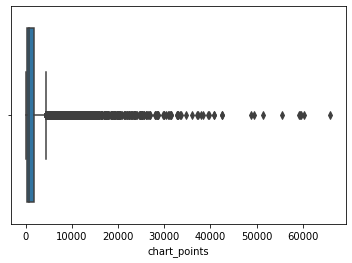

In [52]:
ax = sns.boxplot(x="chart_points", data=main_performer_summed_groupby)

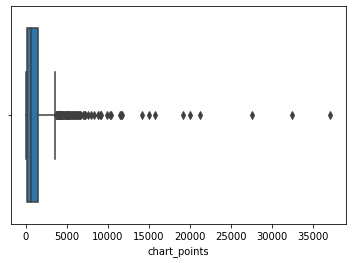

In [53]:
ax = sns.boxplot(x="chart_points", data= featured_performer_summed_groupby)

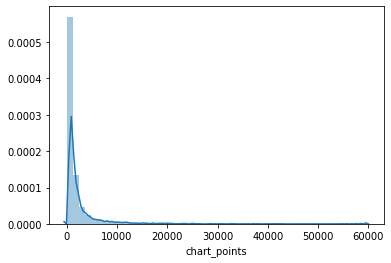

In [54]:
# distplot for chart_points by artist
ax = sns.distplot(performer_summed_groupby.chart_points)

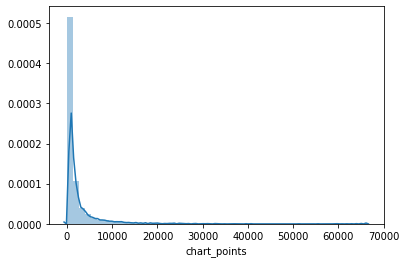

In [55]:
# distplot for chart_points by artist
ax = sns.distplot(main_performer_summed_groupby.chart_points)

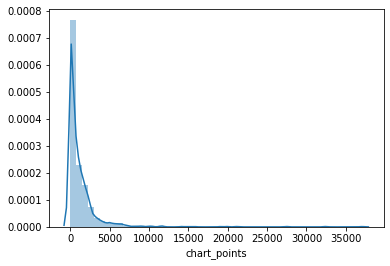

In [56]:
# distplot for chart_points by artist
ax = sns.distplot(featured_performer_summed_groupby.chart_points)

In [57]:
song_id_summed_groupby = billboard_df.groupby('song_id').sum()

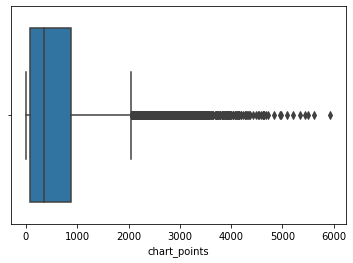

In [58]:
ax = sns.boxplot(x="chart_points", data=song_id_summed_groupby)

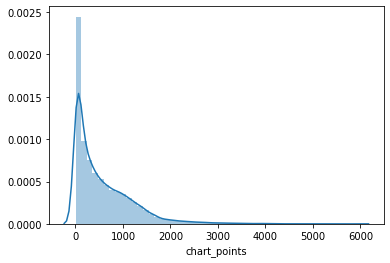

In [59]:
ax = sns.distplot(song_id_summed_groupby.chart_points)

In [60]:
unique_by_year_df = billboard_df.groupby('year').nunique()

In [61]:
unique_by_year_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature,chart_points
year,,,,,,,,,,,,,,,,,
1958,22,100,338,220,352,2,100,100,22,22,5,18,1,220,0,1,100
1959,52,100,641,351,663,3,100,100,26,52,12,31,1,351,0,1,100
1960,53,100,668,334,700,3,100,100,27,53,12,31,1,331,5,2,100
1961,52,100,747,399,779,4,100,100,26,52,12,30,1,398,3,2,100
1962,52,100,748,382,768,5,100,100,40,52,12,31,1,381,2,2,100
1963,52,100,739,389,754,4,100,100,23,52,12,31,1,387,3,2,100
1964,52,100,786,376,811,3,100,100,23,52,12,31,1,375,3,2,100
1965,52,100,773,379,800,2,100,100,25,52,12,31,1,376,5,2,100
1966,53,100,803,412,832,2,100,100,30,53,12,31,1,411,4,2,100


In [62]:
unique_by_year_df = unique_by_year_df.drop("year", axis=1).reset_index()

In [63]:
unique_by_year_df = unique_by_year_df.drop(columns=['week_id','instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'chart_points', 'has_feature'])

In [64]:
unique_by_year_df.head(100)

,year,week_position,song,performer,song_id,main_performer,featured_performer
0,1958,100,338,220,352,220,0
1,1959,100,641,351,663,351,0
2,1960,100,668,334,700,331,5
3,1961,100,747,399,779,398,3
4,1962,100,748,382,768,381,2
5,1963,100,739,389,754,387,3
6,1964,100,786,376,811,375,3
7,1965,100,773,379,800,376,5
8,1966,100,803,412,832,411,4
9,1967,100,802,404,827,403,5


In [65]:
unique_by_year_df['songs_per_performer'] = unique_by_year_df.apply(lambda row: row.song_id / row.performer, axis=1)
unique_by_year_df['songs_per_main_performer'] = unique_by_year_df.apply(lambda row: row.song_id / row.main_performer, axis=1)

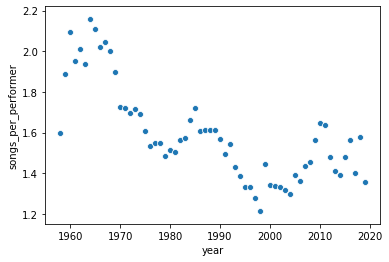

In [66]:
# Songs per artist per year

ax = sns.scatterplot(x="year", y = "songs_per_performer", data=unique_by_year_df)

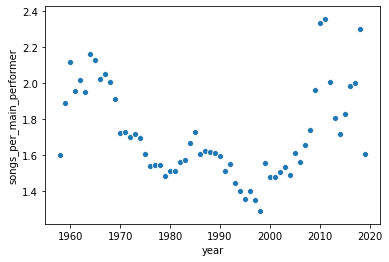

In [67]:
# Songs per main artist per year

ax = sns.scatterplot(x="year", y = "songs_per_main_performer", data=unique_by_year_df)

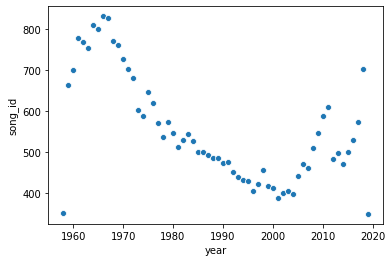

In [68]:
# Unique songs per year

ax = sns.scatterplot(x="year", y = "song_id", data=unique_by_year_df)

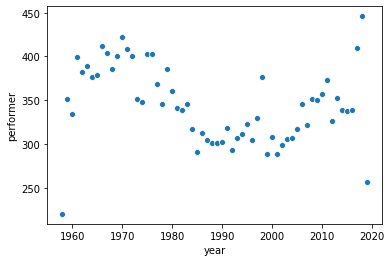

In [69]:
# Unique Performers per year

ax = sns.scatterplot(x="year", y = "performer", data=unique_by_year_df)

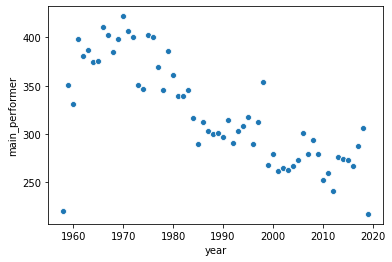

In [70]:
# Unique Performers per year

ax = sns.scatterplot(x="year", y = "main_performer", data=unique_by_year_df)

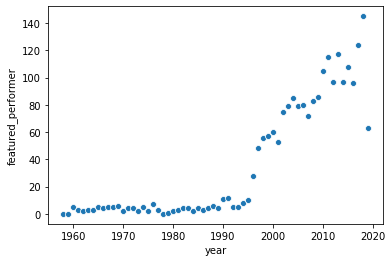

In [71]:
# Unique Performers per year

ax = sns.scatterplot(x="year", y = "featured_performer", data=unique_by_year_df)

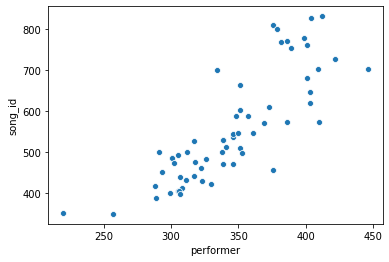

In [72]:
ax = sns.scatterplot(x="performer", y = "song_id", data=unique_by_year_df)

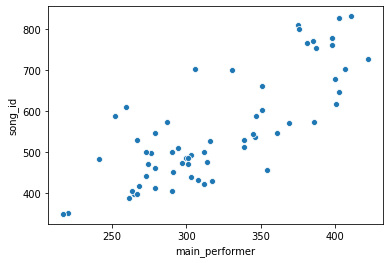

In [73]:
ax = sns.scatterplot(x="main_performer", y = "song_id", data=unique_by_year_df)

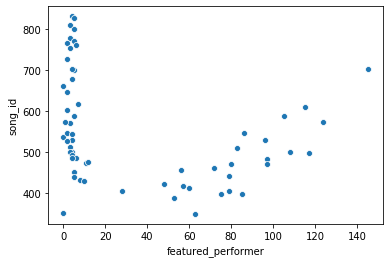

In [74]:
ax = sns.scatterplot(x="featured_performer", y = "song_id", data=unique_by_year_df)

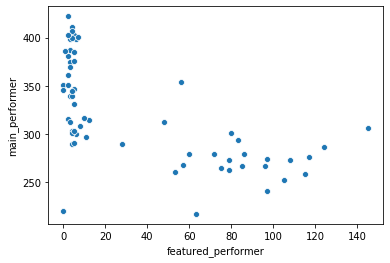

In [75]:
ax = sns.scatterplot(x="featured_performer", y = "main_performer", data=unique_by_year_df)

In [76]:
unique_performers_groupby_df = billboard_df.groupby('performer').nunique()
unique_main_performers_groupby_df = billboard_df.groupby('main_performer').nunique()
unique_featured_performers_groupby_df = billboard_df.groupby('featured_performer').nunique()

Text(0, 0.5, 'Count of Distinct Weeks')

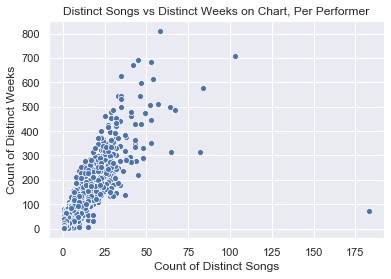

In [77]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "week_id", data=unique_performers_groupby_df)
plt.title('Distinct Songs vs Distinct Weeks on Chart, Per Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Count of Distinct Weeks')

Text(0, 0.5, 'Count of Distinct Weeks')

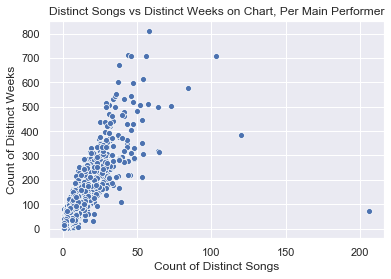

In [78]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "week_id", data=unique_main_performers_groupby_df)
plt.title('Distinct Songs vs Distinct Weeks on Chart, Per Main Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Count of Distinct Weeks')

Text(0, 0.5, 'Count of Distinct Songs')

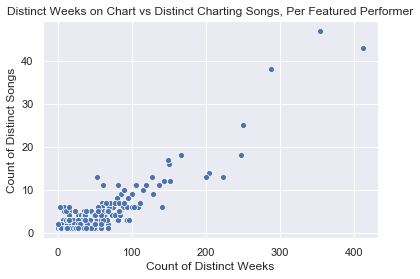

In [79]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="week_id", y = "song_id", data=unique_featured_performers_groupby_df)
plt.title('Distinct Weeks on Chart vs Distinct Charting Songs, Per Featured Performer')
plt.xlabel('Count of Distinct Weeks')
plt.ylabel('Count of Distinct Songs')

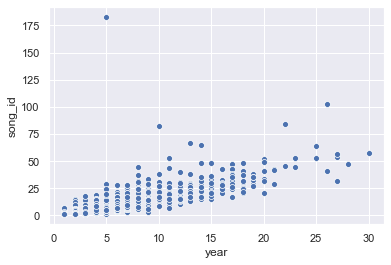

In [80]:

ax = sns.scatterplot(x="year", y = "song_id", data=unique_performers_groupby_df)

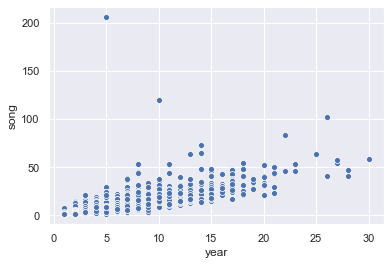

In [81]:

ax = sns.scatterplot(x="year", y = "song", data=unique_main_performers_groupby_df)

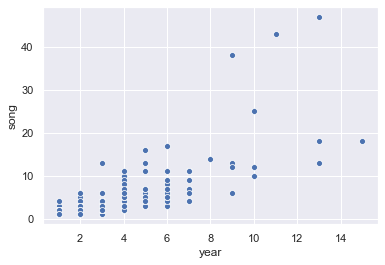

In [82]:

ax = sns.scatterplot(x="year", y = "song", data=unique_featured_performers_groupby_df)

In [83]:
#does this belong earlier in code? 

unique_performers_groupby_df['weeks_per_song'] = unique_performers_groupby_df.apply(lambda row: row.week_id / row.song_id, axis=1)
unique_main_performers_groupby_df['weeks_per_song'] = unique_main_performers_groupby_df.apply(lambda row: row.week_id / row.song_id, axis=1)
unique_featured_performers_groupby_df['weeks_per_song'] = unique_featured_performers_groupby_df.apply(lambda row: row.week_id / row.song_id, axis=1)


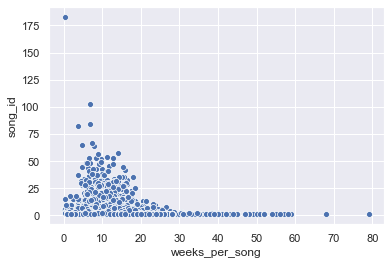

In [84]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_performers_groupby_df)

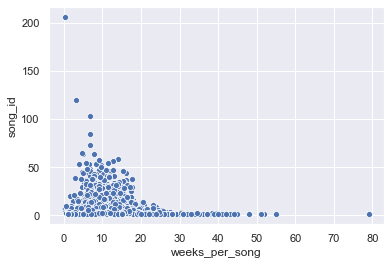

In [85]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_main_performers_groupby_df)

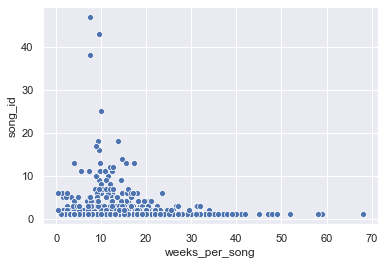

In [86]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_featured_performers_groupby_df)

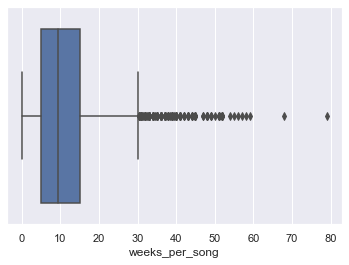

In [87]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_performers_groupby_df)

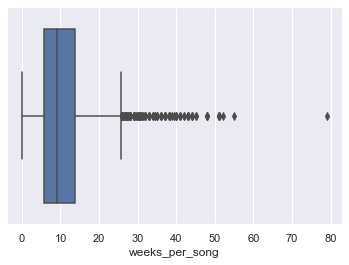

In [88]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_main_performers_groupby_df)

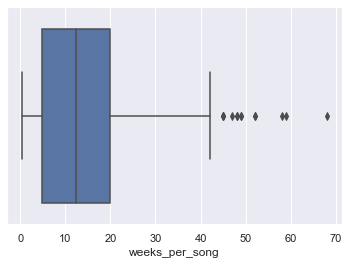

In [89]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_featured_performers_groupby_df)

In [90]:
instance_groupby = billboard_df.groupby('instance').sum()

In [91]:
instance_groupby.head()

,week_position,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
instance,,,,,,,,,
1,15063399,12890340.0,12321800,2637478,1964624,4725252,597384289,26191,15291646.0
2,839534,686623.0,732977,201408,93403,232107,29472249,2893,646782.0
3,116513,93378.0,101077,33116,12365,31952,4141191,401,91850.0
4,19186,14518.0,18262,3517,1655,4293,532013,11,7579.0
5,6368,4935.0,5401,2221,631,1965,255413,5,6459.0


In [92]:
total = instance_groupby['chart_points'].sum()
print (total)
weeks_total = instance_groupby['weeks_on_chart'].sum()
print (weeks_total)

16048874.0
2879282


In [93]:
instance_groupby['percentage_chart_points'] = instance_groupby.apply(lambda row: row.chart_points/total, axis=1)
instance_groupby['percentage_weeks_on_chart'] = instance_groupby.apply(lambda row: row.weeks_on_chart/weeks_total, axis=1)

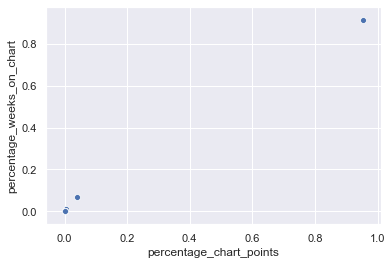

In [94]:
# I need to find a better way to chart this. 

ax = sns.scatterplot(x="percentage_chart_points", y = "percentage_weeks_on_chart", data=instance_groupby)

# Creating Gini Function


In [95]:
# Defining Gini function

def gini_function(series):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = series.to_numpy().flatten() #all values are treated equally, arrays must be 1d

    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient 

In [96]:
song_id_points_yearly_groupby_df = billboard_df.groupby(['song_id', 'year']).chart_points.sum().reset_index()
performer_points_yearly_groupby_df = billboard_df.groupby(['performer', 'year']).chart_points.sum().reset_index()
main_performer_points_yearly_groupby_df = billboard_df.groupby(['main_performer', 'year']).chart_points.sum().reset_index()

In [97]:
main_performer_points_yearly_groupby_df.dtypes

main_performer     object
year                int64
chart_points      float64
dtype: object

In [98]:
#creating gini DF's for chart point analysis
song_id_points_gini_df = song_id_points_yearly_groupby_df.groupby('year').agg({'chart_points':gini_function})
performer_points_gini_df = performer_points_yearly_groupby_df.groupby('year').agg({'chart_points':gini_function})
main_performer_points_gini_df = main_performer_points_yearly_groupby_df.groupby('year').agg({'chart_points':gini_function})

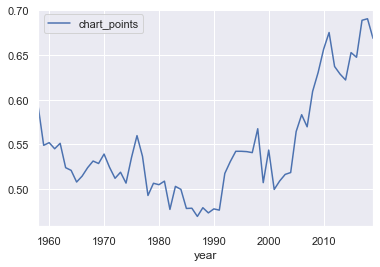

In [99]:
song_id_points_gini_df.plot()

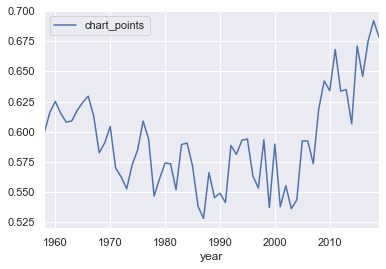

In [100]:
performer_points_gini_df.plot()

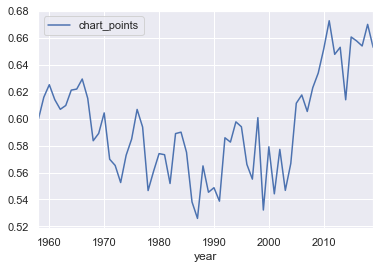

In [101]:
main_performer_points_gini_df.plot()

# unique years analysis


In [102]:
performer_min_year_groupby = billboard_df.groupby(['performer']).year.min().reset_index()

In [103]:
performer_unique_years_groupby = billboard_df.groupby(['performer']).year.nunique().reset_index()

In [104]:
performer_unique_years_groupby = performer_unique_years_groupby.rename(columns={"year": "unique_years"})
performer_unique_years_groupby.head(200)


,performer,unique_years
0,"""Groove"" Holmes",1
1,"""Little"" Jimmy Dickens",1
2,"""Pookie"" Hudson",1
3,"""Weird Al"" Yankovic",9
4,'N Sync,5
5,'N Sync & Gloria Estefan,2
6,'N Sync Featuring Nelly,1
7,'Til Tuesday,4
8,(+44),1
9,(The Preacher) Bobby Womack,1


In [105]:
performer_joined_df = performer_min_year_groupby.set_index('performer').join(performer_unique_years_groupby.set_index('performer'))

In [106]:
performer_min_year_groupby.head(200)

,performer,year
0,"""Groove"" Holmes",1966
1,"""Little"" Jimmy Dickens",1965
2,"""Pookie"" Hudson",1963
3,"""Weird Al"" Yankovic",1983
4,'N Sync,1998
5,'N Sync & Gloria Estefan,1999
6,'N Sync Featuring Nelly,2002
7,'Til Tuesday,1985
8,(+44),2006
9,(The Preacher) Bobby Womack,1972


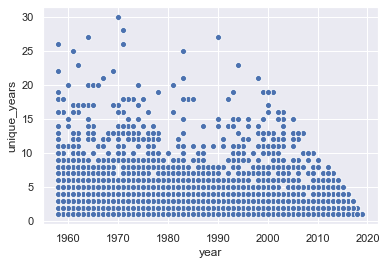

In [107]:
ax = sns.scatterplot(x="year", y = "unique_years", data=performer_joined_df)

In [108]:
# main_performer
main_performer_min_year_groupby = billboard_df.groupby(['main_performer']).year.min().reset_index()
main_performer_unique_years_groupby = billboard_df.groupby(['main_performer']).year.nunique().reset_index()
main_performer_unique_years_groupby = main_performer_unique_years_groupby.rename(columns={"year": "unique_years"})

In [109]:
main_performer_joined_df = main_performer_min_year_groupby.set_index('main_performer').join(main_performer_unique_years_groupby.set_index('main_performer'))

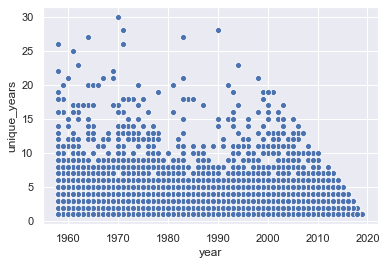

In [110]:
ax = sns.scatterplot(x="year", y = "unique_years", data=main_performer_joined_df)

In [111]:
# featured_performer
featured_performer_min_year_groupby = billboard_df.groupby(['featured_performer']).year.min().reset_index()
featured_performer_unique_years_groupby = billboard_df.groupby(['featured_performer']).year.nunique().reset_index()
featured_performer_unique_years_groupby = featured_performer_unique_years_groupby.rename(columns={"year": "unique_years"})

In [112]:
featured_performer_joined_df = featured_performer_min_year_groupby.set_index('featured_performer').join(featured_performer_unique_years_groupby.set_index('featured_performer'))

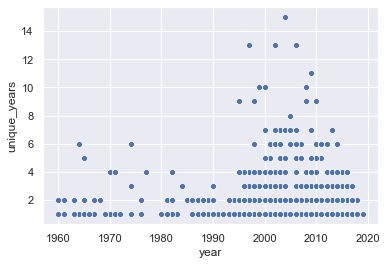

In [113]:
ax = sns.scatterplot(x="year", y = "unique_years", data= featured_performer_joined_df)

In [114]:
performer_joined_mean_year_df = performer_joined_df.groupby(['year']).unique_years.mean().reset_index()
main_performer_joined_mean_year_df = main_performer_joined_df.groupby(['year']).unique_years.mean().reset_index()
featured_performer_joined_mean_year_df = featured_performer_joined_df.groupby(['year']).unique_years.mean().reset_index()

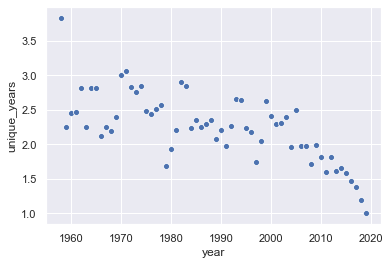

In [115]:
ax = sns.scatterplot(x="year", y = "unique_years", data=performer_joined_mean_year_df)

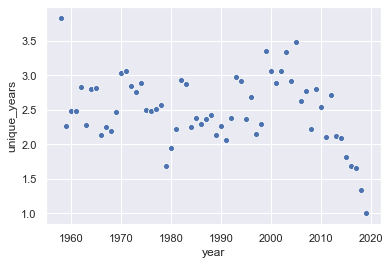

In [116]:
ax = sns.scatterplot(x="year", y = "unique_years", data=main_performer_joined_mean_year_df)

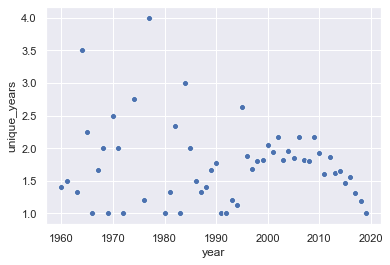

In [117]:
ax = sns.scatterplot(x="year", y = "unique_years", data=featured_performer_joined_mean_year_df)

In [118]:
performer_yearly_median_groupby =  performer_joined_df.groupby(['year']).unique_years.median().reset_index()
main_performer_yearly_median_groupby =  main_performer_joined_df.groupby(['year']).unique_years.median().reset_index()
featured_performer_yearly_median_groupby =  featured_performer_joined_df.groupby(['year']).unique_years.median().reset_index()

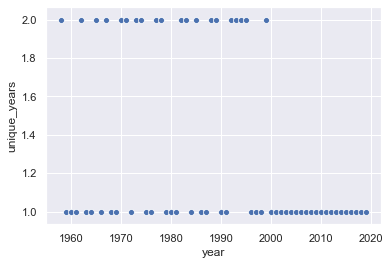

In [119]:
ax = sns.scatterplot(x="year", y = "unique_years", data=performer_yearly_median_groupby)

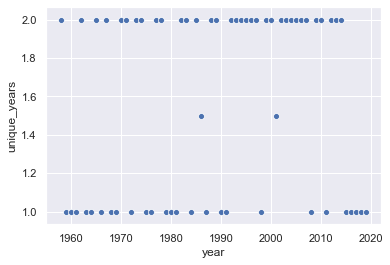

In [120]:
ax = sns.scatterplot(x="year", y = "unique_years", data=main_performer_yearly_median_groupby)

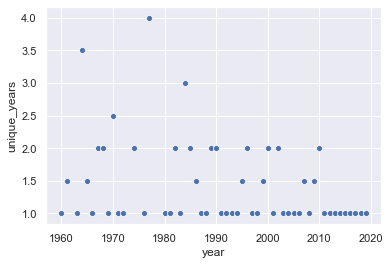

In [121]:
ax = sns.scatterplot(x="year", y = "unique_years", data=featured_performer_yearly_median_groupby)

# Weekly Analysis

In [122]:
performer_unique_week_id_groupby = billboard_df.groupby(['performer']).week_id.nunique().reset_index()
main_performer_unique_week_id_groupby = billboard_df.groupby(['main_performer']).week_id.nunique().reset_index()
featured_performer_unique_week_id_groupby = billboard_df.groupby(['featured_performer']).week_id.nunique().reset_index()

In [123]:


performer_joined_mean_week_df = performer_min_year_groupby.set_index('performer').join(performer_unique_week_id_groupby.set_index('performer'))
main_performer_joined_mean_week_df = main_performer_min_year_groupby.set_index('main_performer').join(main_performer_unique_week_id_groupby.set_index('main_performer'))
featured_performer_joined_mean_week_df = featured_performer_min_year_groupby.set_index('featured_performer').join(featured_performer_unique_week_id_groupby.set_index('featured_performer'))



In [124]:
performer_joined_mean_week_df.head()

,year,week_id
performer,,
"""Groove"" Holmes",1966,14
"""Little"" Jimmy Dickens",1965,10
"""Pookie"" Hudson",1963,1
"""Weird Al"" Yankovic",1983,84
'N Sync,1998,156


# note: I'm skipping the median and max groupby stuff because I got a little confused with DF names. I'll include it if it belongs in the story. 